In [1]:
# Autor: Carlos Juárez
# Fecha: 2025-10-23
# Descripción: Péndulo Invertido - Lugar de las raíces
# Código con IA

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import control as ct
import sympy as sp


In [3]:
# Parámetros del sistema
m = 0.5   # masa del péndulo (kg)
M = 2.0   # masa del carro (kg)
L = 0.3   # longitud del péndulo (m)
g = 9.81  # aceleración debida a la gravedad (m/s^2)
u = 0

In [6]:
# Ecuaciones del sistema
# Definimos las variables simbólicas
theta, theta_dot, x, x_dot = sp.symbols('theta theta_dot x x_dot')

# Ecuaciones linealizadas
def equations_of_motion(y, t):
    theta, theta_dot, x, x_dot = y
    dtheta_dt = theta_dot
    dx_dt = x_dot
    d2theta_dt2 = ((M+m)*g/(M*L))*theta - u
    d2x_dt2 = (u - m*g*theta)/M
    return [dtheta_dt, d2theta_dt2, dx_dt, d2x_dt2]

sol = odeint(equations_of_motion, [0.1, 0, 0, 0], np.linspace(0, 10, 100))

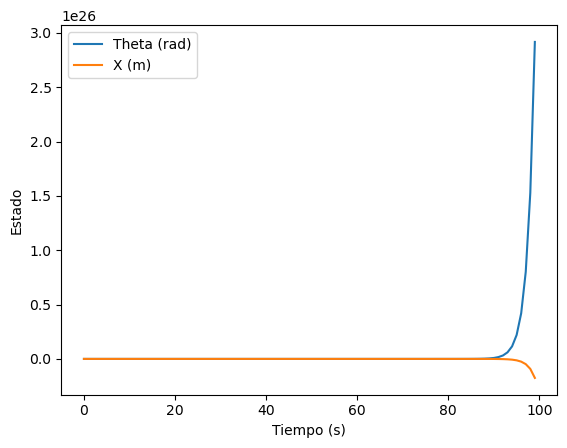

In [8]:
plt.plot(sol[:, 0], label='Theta (rad)')
plt.plot(sol[:, 2], label='X (m)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Estado')
plt.legend()
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


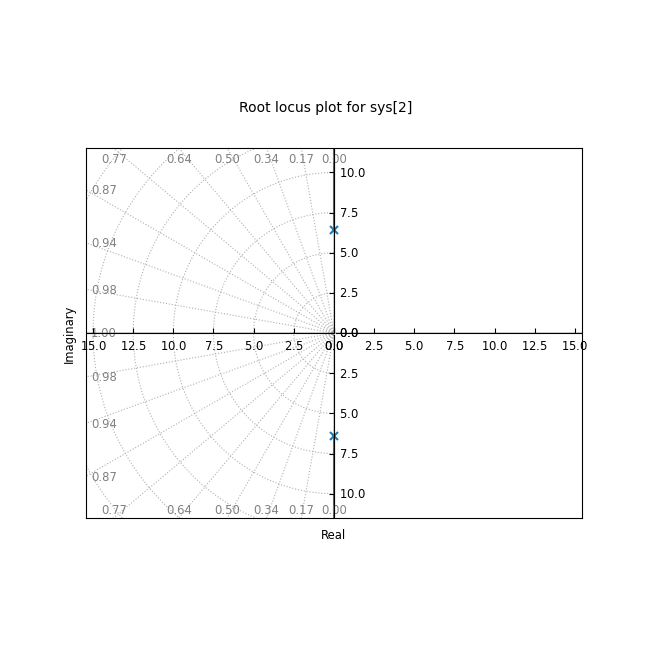

In [11]:
# Lugar de las raíces
G = ct.TransferFunction([1], [M*L,0, (M+m)*g])
ct.rlocus(G)
plt.show()